### preparing voice data clips for voice unit
* use cv-corpus-12.0-2022-12-07 emglish collection
* remove those speakers (client_id) that gender = 'other', OR have any down_votes > 0
* even those that have clips with down_votes = 0, as long as the speaker even has one clip that received down_votes
* in addition, for the younger speakers group, remove those speakers with less than 6 clips recorded
* this reduced data volume from 90 GB to 2GB, speakers from 33806 to 1123, clips from 986571 to 15006

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import librosa


In [2]:
filename = "voice_clips_meta_data.csv"
list_clip = pd.read_csv(filename)
list_clip.head()

,client_id,path,sentence,up_votes,down_votes,age,gender
0,538b6b4edc829fd43b014c5d741b9d26330a856d38b6cf...,common_voice_en_32640902.mp3,He has received two state nominations also.,2.0,0.0,seventies,male
1,538b6b4edc829fd43b014c5d741b9d26330a856d38b6cf...,common_voice_en_32640905.mp3,He played cricket for Merchiston Castle School.,2.0,0.0,seventies,male
2,538b6b4edc829fd43b014c5d741b9d26330a856d38b6cf...,common_voice_en_32640907.mp3,Her birth name is not recorded.,2.0,0.0,seventies,male
3,538b6b4edc829fd43b014c5d741b9d26330a856d38b6cf...,common_voice_en_32640979.mp3,They later shifted to Music Production under t...,2.0,0.0,seventies,male
4,59e93c3736dc425c1f9520d909bfb82c6b86d43c1d3204...,common_voice_en_19687885.mp3,"Sheila was cremated, and the casket with her a...",2.0,0.0,seventies,female


(143678,) 22050


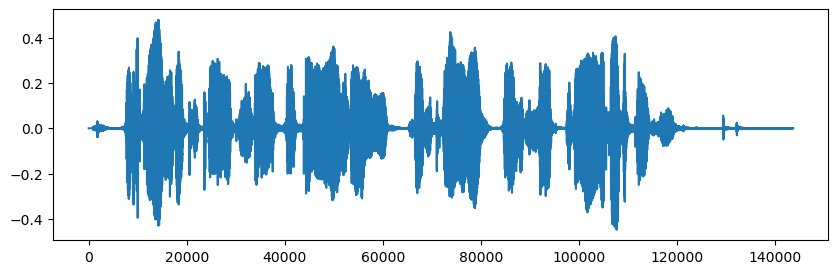

In [3]:
import librosa
from IPython.display import Audio

plt.subplots(figsize=(10,3))
data_dir = '/Users/yingli/Development/AppliedDataScience/applieddatascience/sample_code/voice_clips/'
#audiofile = list_clip.path[100]
audiofile = "common_voice_en_32810621.mp3" # eighties female
audiofile = "common_voice_en_30282850.mp3" # fifties female
audiofile = "common_voice_en_32879293.mp3" # eighties male
audiofile = "common_voice_en_32260076.mp3" # twenties female
audiofile = "common_voice_en_20002554.mp3" # sixties male
audiofile = "common_voice_en_30615145.mp3"  # teen male
audiofile = "common_voice_en_35117939.mp3" # teen female
x, sr = librosa.load(data_dir+audiofile)
print(x.shape, sr)
plt.plot(x)
Audio(data=x, rate=sr)

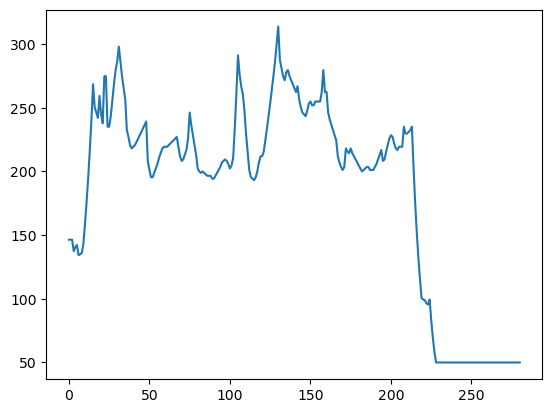

In [4]:
f0, voiced_flag, voiced_probs = librosa.pyin(x,sr=sr, fmin=50, fmax=1000, fill_na=None)
plt.plot(f0)

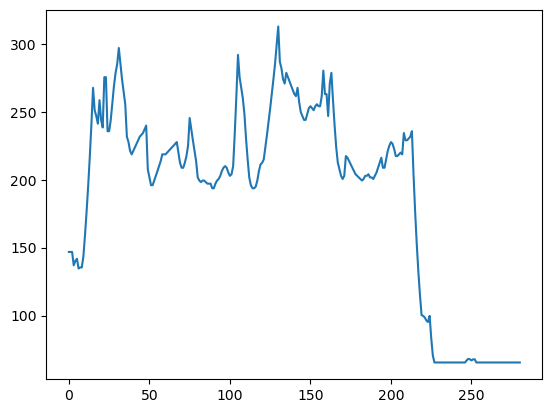

In [5]:
f0, voiced_flag, voiced_probs = librosa.pyin(x,
                                             sr=sr,
                                             fmin=librosa.note_to_hz('C2'),
                                             fmax=librosa.note_to_hz('C8'),
                                             fill_na=None)
plt.plot(f0)

In [6]:
y, sr = librosa.load(librosa.ex('trumpet'))

Audio(data=y, rate=sr)

In [7]:
f0, voiced_flag, voiced_probs = librosa.pyin(y,
                                             sr=sr,
                                             fmin=librosa.note_to_hz('C2'),
                                             fmax=librosa.note_to_hz('C7'),
                                             fill_na=None)

# To synthesize the f0, we'll need sample times
times = librosa.times_like(f0)

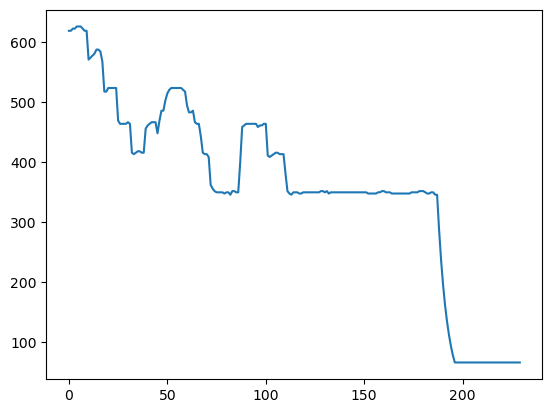

In [8]:
plt.plot(f0)

(208512,) 32000


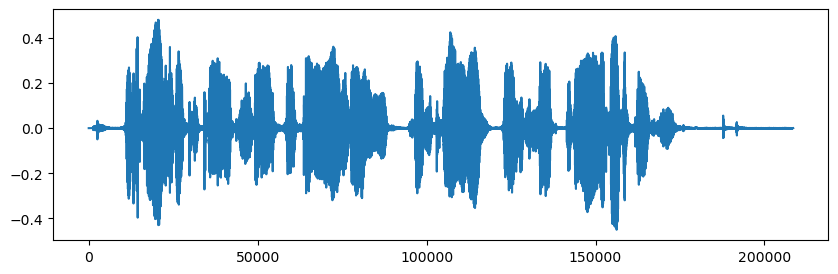

In [9]:
plt.subplots(figsize=(10,3))
x, sr = librosa.load(data_dir+audiofile, sr = None)
print(x.shape, sr)
plt.plot(x)

(52128,) 8000


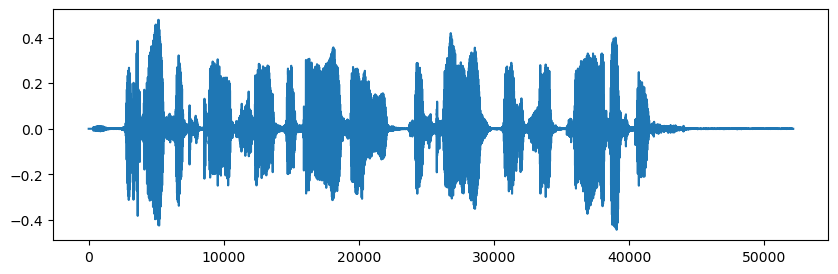

In [10]:
plt.subplots(figsize=(10,3))
x, sr = librosa.load(data_dir+audiofile, sr = 8000)
print(x.shape, sr)
plt.plot(x)

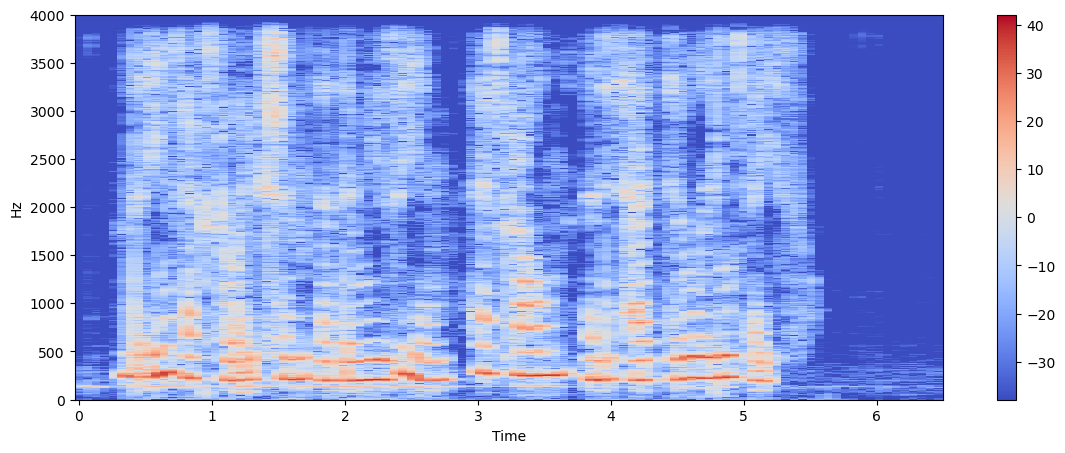

In [11]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

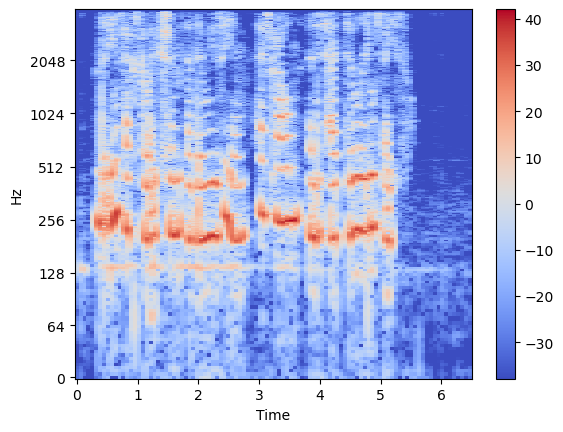

In [12]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [13]:
import soundcard as sc
# get the default speaker
default_speaker = sc.default_speaker()
# get the default microphone
default_mic = sc.default_microphone()

print(default_speaker)
print(default_mic)

<Speaker Built-in Output (2 channels)>
<Microphone Built-in Microphone (2 channels)>


In [14]:
sample_rate = 48000
num_second = 2
num_frames = sample_rate * int(num_second)


In [15]:
audiodata = default_mic.record(samplerate=sample_rate, numframes=num_frames)
default_speaker.play(audiodata, samplerate=sample_rate)

In [16]:
default_speaker.play(x,samplerate = sr)

In [17]:
from pydub import AudioSegment

dst = "test.wav"
sound = AudioSegment.from_mp3(data_dir+audiofile)
sound.export(dst, format="wav")

<_io.BufferedRandom name='test.wav'>

In [18]:
audiodata

array([[-0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00],
       ...,
       [ 7.54107677e-05,  7.54107677e-05],
       [-3.02360058e-06, -3.02360058e-06],
       [-2.12521845e-05, -2.12521845e-05]])

In [19]:
sound

In [20]:
x, sr = librosa.load(dst)
x

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 5.2848336e-06,
       8.1964117e-06, 3.6434692e-05], dtype=float32)

In [21]:
print(type(x), type(sr))
print(x.shape, sr)


<class 'numpy.ndarray'> <class 'int'>
(143678,) 22050


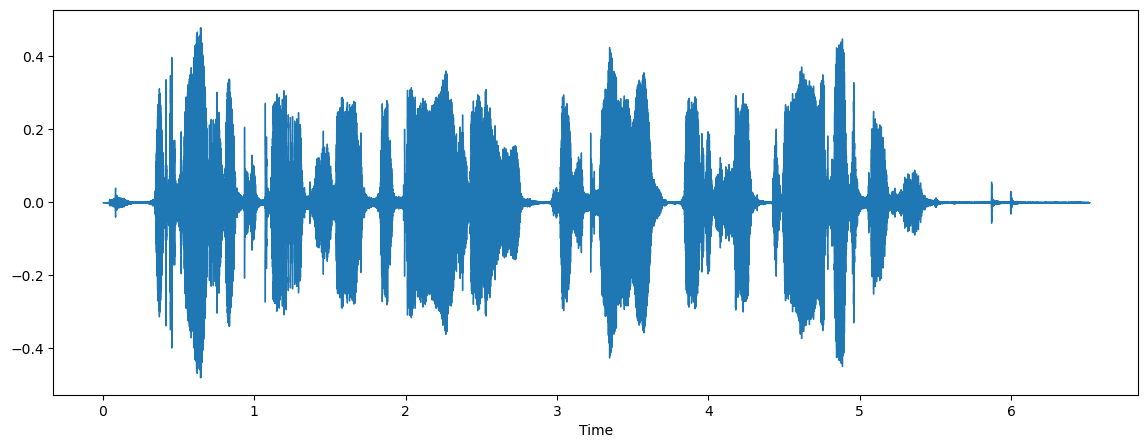

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)
